## Meta Analysis

### 1. Create Dataset
If you already have a dataset, you do not have to follow this section, I will going to show you how the simulation will be done.

In [2]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname(os.path.abspath(os.path.dirname('pwd'))))))

You can select $n$ and $k$ from the function, each of which refers to the number of sample and ratio that two group coming from same distribution. 

In [3]:
import numpy as np
from scipy.stats import truncnorm
def get_group_nk(n,k):
    bounds=[0,20]
    pointwiseentropyg1=[]
    pointwiseentropyg2=[]
    ratio=k*0.01
    predecsion_mean=np.random.randint(1,13,int(ratio*n))
    predecision_sd=np.random.randint(1,6,int(ratio*n))
    diff_mean1=np.random.randint(1,13,int((1-ratio)*n))
    diff_mean2=np.random.randint(1,13,int((1-ratio)*n))
    diff_sig1=np.random.randint(1,6,int((1-ratio)*n))
    diff_sig2=np.random.randint(1,6,int((1-ratio)*n))
    for i in range(int(ratio*n)):
        loc=predecsion_mean[i]
        scale=predecision_sd[i]
        sample1=[]
        sample2=[]
        for sample in range(20):
            s1=truncnorm.rvs((bounds[0]-loc)/scale, (bounds[1]-loc)/scale, loc=loc, scale=scale)
            s2=truncnorm.rvs((bounds[0]-loc)/scale, (bounds[1]-loc)/scale, loc=loc, scale=scale)
            sample1.append(s1)
            sample2.append(s2)
        pointwiseentropyg1.append(sample1)
        pointwiseentropyg2.append(sample2)
    for i in range(int((1-ratio)*n)):
        loc1=diff_mean1[i]
        scale1=diff_sig1[i]
        loc2=diff_mean2[i]
        scale2=diff_sig2[i]
        sample1=[]
        sample2=[]
        for sample in range(20):
            s1=truncnorm.rvs((bounds[0]-loc1)/scale1, (bounds[1]-loc1)/scale1, loc=loc1, scale=scale1)
            s2=truncnorm.rvs((bounds[0]-loc2)/scale2, (bounds[1]-loc2)/scale2, loc=loc2, scale=scale2)
            sample1.append(s1)
            sample2.append(s2)
        pointwiseentropyg1.append(sample1)
        pointwiseentropyg2.append(sample2)
    p1_10=np.array(pointwiseentropyg1)
    p2_10=np.array(pointwiseentropyg2)
    return p1_10,p2_10

For example,  if you call a function ```a,b=get_group_nk(100,10)```, then two groups that have 10 percent of feature coming from same distribution is generated.  

In [4]:
a,b=get_group_nk(100,10) 

### 2. Finding bandwidth for each feature
then, you select one group to find some relationship between standard deviation that data itself have. 
by calling the function ```finddistribution```, you can obtain the bandwidth for each feature. 

In [5]:
from src.Grouping import Groupinfo
x_grid=np.arange(0,20,0.1)
feat_info=np.zeros(100)
feat_info+=1 ## as this is simulated  case, you cannot consider the prior-posterior case. 
t1=Groupinfo(a)
t1.finddistribution(x_grid,epsilon=0.0001,feat_info=feat_info)

then by using the defined functions, you can get the sigma and bandwidth for the generated case. 

In [21]:
bw=np.array(t1.group_bandwidth)
sig=np.sqrt(np.array(t1.getsigma()))
from matplotlib import pyplot as plt

this is a scatter of randomly generated data

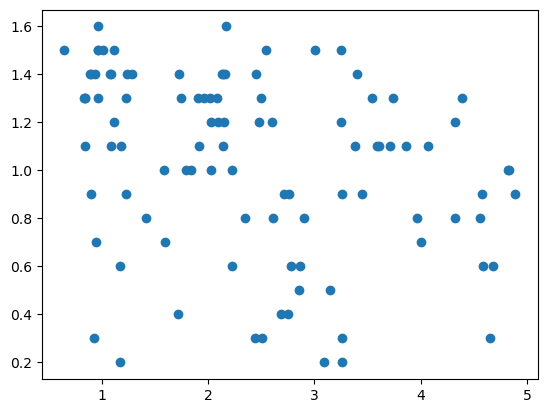

In [22]:
plt.scatter(sig,bw)

now based on the plot's structure you can eiter fit log or polynomial regression to the data. 

In [26]:
model = np.poly1d(np.polyfit(sig, bw, 2))
coef=model.coefficients
x_grid=np.arange(0,5,0.1)

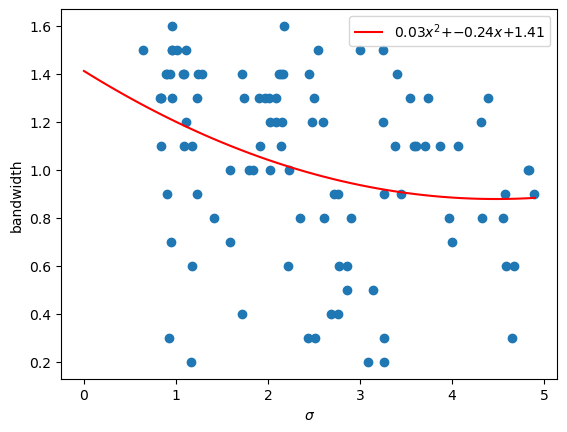

In [35]:
plt.scatter(sig,bw)
plt.xlabel('$\sigma$')
plt.ylabel('bandwidth')
plt.plot(x_grid,((x_grid**2)*coef[0]+(x_grid)*coef[1]+coef[2]),color='r',label='${}x^2$${}x$+{}'.format(round(coef[0],2),round(coef[1],2),round(coef[2],2)))
plt.legend()